In [23]:
#!pip install -q dowhy

Un detalle importante:
* Teníamos 6 variables iniciales, donde 2 de ellas Sl2l.dm y sl2dl.vl estaban correlacionadas (al menos en una primera visualización gráfica) Por ello dejamos solo 5.

Variables
* ccbd.dm = Corpus Callosum Body, Diamater
* ccbd.ml = Corpus Callosum Body, Mean Length
* sl2l.dm = Superior Longitudinal Fasciculus 2 Left, Diamater
* sl2l.ml = Superior Longitudinal Fasciculus 2 Left, Mean Length
* tral.vl = Thalamic Radiation Anterior Left, Volume

Algunas preguntas:
* ¿Es posible identificar variables confusoras?

Preguntas de intervención:
--Son preguntas un poco tiradas pero ayudan a entender el concepto.--
* ¿Aumentar ccbd.dm afecta al sujeto de estudio?, 
* ¿Cómo cambia la probabilidad de esquizofrenia si controla regularmente ccbd.dm? 
* Disminuiría la esquizofrenia si aumentara ccbd.ml
* Disminuiría la esquizofrenia si aumentara sl2l.dm
* Disminuiría la esquizofrenia si aumentara sl2l.ml
* Disminuiría la esquizofrenia si aumentara tral.vl?

Preguntas de predicción: (ejemplo de prueba)
* ¿Cuál es la probabilidad de que un sujeto de estudio sufra de esquizofrenia si tiene ccbd.dm = 0.5, ccbd.ml = 0.5, sl2l.dm = 0.5, sl2l.ml = 0.5, tral.vl = 0.5?
* 
Preguntas contrafacticas:
* ¿El sujeto de estudio habría sufrido de la patología si hubiera controlado ccbd.dm un año antes? 
* "¿un paciente dado habría sufrido insuficiencia cardíaca si hubiera comenzado a hacer ejercicio un año antes?

Datos que poseemos
* Tenemos datos observacionales con intervenciones (niveles de tratamientos de cada factor) desconocidas en sus features (factores) y con un target conocido. Utilizamos ingeniería de features para crear un nuevo dataset de features seleccionados a partir de la importante granularidad de datos de alto nivel (nombres fascículos y sus propiedades), buscando el camino de las intervenciones con conocimiento de dominio.
* 

In [2]:
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [5]:
import networkx as nx
causal_graph = nx.DiGraph([('X', 'Y'), ('Y', 'Z')])

In [6]:
import dowhy.gcm as gcm
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from graphviz import Source
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture

In [ ]:
import dowhy
import dowhy.datasets
import dowhy.gcm as gcm
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from graphviz import Source
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.mixture import GaussianMixture

In [24]:
# from dowhy import gcm
# causal_model = gcm.StructuralCausalModel(causal_graph)

In [3]:
DATA_PATH = "../data/union/End"
def load_data_prep(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final.csv")
    return pd.read_csv(csv_path)

In [4]:
df = load_data_prep()
df1 = df[[ 'ccbd_diameter', 'sl2l_mean_length',
 'sl2l_diameter', 'ccbd_mean_length',
 'sl2l_volume', 'tral_volume','label']]
df1.shape

(96, 7)

In [106]:
#!pip install -q graphviz


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
data['gml_graph']

'graph[directed 1node[ id "y" label "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"]node[ id "v0" label "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"] edge[ source "W1" target "v0"]edge[ source "W0" target "y"] edge[ source "W1" target "y"]]'

In [ ]:
Variables
* ccbd.dm = Corpus Callosum Body, Diamater
* ccbd.ml = Corpus Callosum Body, Mean Length
* sl2l.dm = Superior Longitudinal Fasciculus 2 Left, Diamater
* sl2l.ml = Superior Longitudinal Fasciculus 2 Left, Mean Length
* tral.vl = Thalamic Radiation Anterior Left, Volume


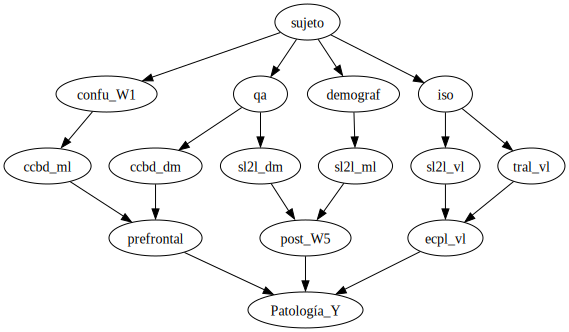

In [47]:
s = 'digraph {\
    sujeto;\
    confu_W1;\
    qa;\
    demograf;\
    iso;\
    prefrontal;\
    ecpl_vl;\
    ccbd_ml;\
    ccbd_dm;\
    sl2l_dm;\
    sl2l_ml;\
    sl2l_vl;\
    tral_vl;\
    sujeto -> confu_W1;\
    sujeto -> qa;\
    sujeto -> demograf;\
    sujeto -> iso;\
    confu_W1 -> ccbd_ml -> prefrontal;\
    qa -> ccbd_dm  -> prefrontal; qa -> sl2l_dm -> post_W5;\
    demograf -> sl2l_ml -> post_W5 -> Patología_Y;\
    iso -> sl2l_vl -> ecpl_vl ;\
    iso -> tral_vl -> ecpl_vl -> Patología_Y;\
    prefrontal -> Patología_Y;\
        }'
dot = Source(s)
dot

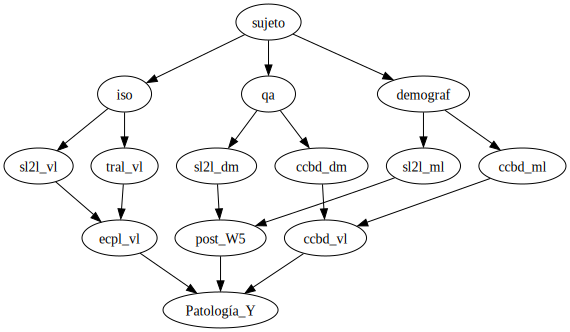

In [57]:
s = 'digraph {\
    sujeto;\
    qa;\
    demograf;\
    iso;\
    ecpl_vl;\
    ccbd_ml;\
    ccbd_dm;\
    sl2l_dm;\
    sl2l_ml;\
    sl2l_vl;\
    tral_vl;\
    sujeto -> qa;\
    sujeto -> demograf;\
    sujeto -> iso;\
    demograf -> ccbd_ml -> ccbd_vl;\
    qa -> ccbd_dm  -> ccbd_vl; qa -> sl2l_dm -> post_W5;\
    demograf -> sl2l_ml -> post_W5 -> Patología_Y;\
    iso -> sl2l_vl -> ecpl_vl ;\
    iso -> tral_vl -> ecpl_vl -> Patología_Y;\
    ccbd_vl -> Patología_Y;\
        }'
dot = Source(s)
dot

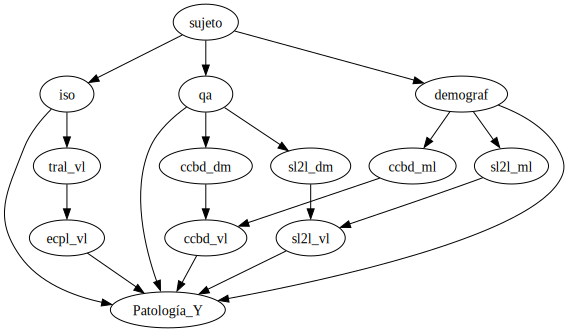

In [74]:
#Opcion 1
s = 'digraph {\
    sujeto;\
    qa;\
    demograf;\
    iso;\
    ecpl_vl;\
    ccbd_ml;\
    ccbd_dm;\
    sl2l_dm;\
    sl2l_ml;\
    sl2l_vl;\
    tral_vl;\
    sujeto -> qa -> Patología_Y;\
    sujeto -> demograf -> Patología_Y;\
    sujeto -> iso -> Patología_Y;\
    demograf -> ccbd_ml -> ccbd_vl;\
    qa -> ccbd_dm  -> ccbd_vl; qa -> sl2l_dm -> sl2l_vl;\
    demograf -> sl2l_ml -> sl2l_vl -> Patología_Y;\
    iso -> tral_vl -> ecpl_vl -> Patología_Y;\
    ccbd_vl -> Patología_Y;\
        }'
dot = Source(s)
dot

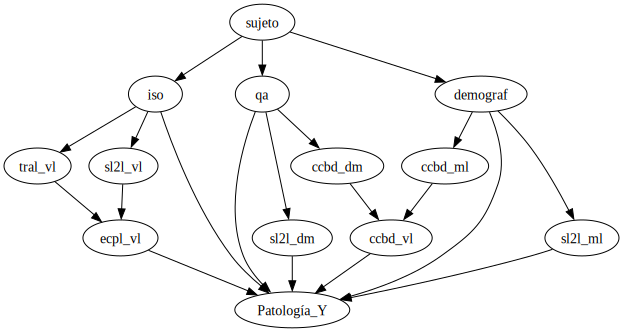

In [73]:
#Opción 2
s = 'digraph {\
    sujeto;\
    qa;\
    demograf;\
    iso;\
    ecpl_vl;\
    ccbd_ml;\
    ccbd_dm;\
    sl2l_dm;\
    sl2l_ml;\
    sl2l_vl;\
    tral_vl;\
    sujeto -> qa -> Patología_Y;\
    sujeto -> demograf -> Patología_Y;\
    sujeto -> iso -> Patología_Y;\
    demograf -> ccbd_ml -> ccbd_vl;\
    qa -> ccbd_dm  -> ccbd_vl; qa -> sl2l_dm -> Patología_Y;\
    demograf -> sl2l_ml -> Patología_Y;\
    iso -> sl2l_vl -> ecpl_vl ;\
    iso -> tral_vl -> ecpl_vl -> Patología_Y;\
    ccbd_vl -> Patología_Y;\
        }'
dot = Source(s)
dot

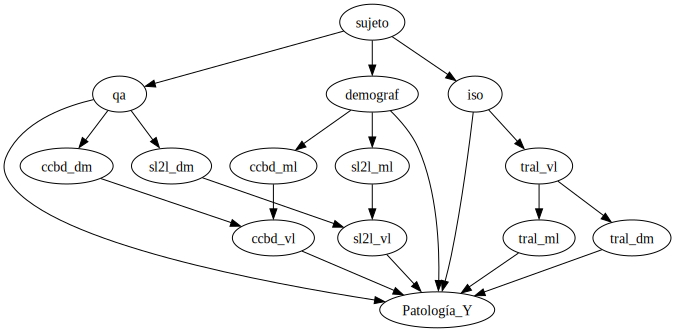

In [72]:
#Opcion 3
s = 'digraph {\
    sujeto;\
    qa;\
    demograf;\
    iso;\
    ccbd_ml;\
    ccbd_dm;\
    sl2l_dm;\
    sl2l_ml;\
    sl2l_vl;\
    tral_vl;\
    sujeto -> qa -> Patología_Y;\
    sujeto -> demograf -> Patología_Y;\
    sujeto -> iso -> Patología_Y;\
    demograf -> ccbd_ml -> ccbd_vl;\
    qa -> ccbd_dm  -> ccbd_vl; qa -> sl2l_dm -> sl2l_vl;\
    demograf -> sl2l_ml -> sl2l_vl -> Patología_Y;\
    iso -> tral_vl -> tral_dm; tral_vl -> tral_ml;\
    tral_dm -> Patología_Y; tral_ml -> Patología_Y;\
    ccbd_vl -> Patología_Y;\
        }'
dot = Source(s)
dot

In [7]:
df1

,ccbd_diameter,sl2l_mean_length,sl2l_diameter,ccbd_mean_length,sl2l_volume,tral_volume,label
0,27.3579,77.9722,25.0746,111.237,38503.1,19479.70,1
1,25.3084,71.5813,21.3498,115.111,25625.7,14019.30,1
2,26.0740,60.0889,15.1676,109.945,10857.2,17719.00,1
3,30.9647,74.3867,21.7978,109.997,27759.5,15856.40,1
4,24.6510,76.1318,25.3700,131.729,38485.5,22291.20,1
...,...,...,...,...,...,...,...
91,31.1224,68.8827,25.5980,121.836,35449.8,15791.80,0
92,28.1051,75.9066,23.5453,121.552,33050.5,7114.43,0
93,29.8152,69.8808,22.7946,123.909,28517.5,18160.70,0
94,31.1268,72.8304,23.5768,126.011,31796.1,19594.30,0


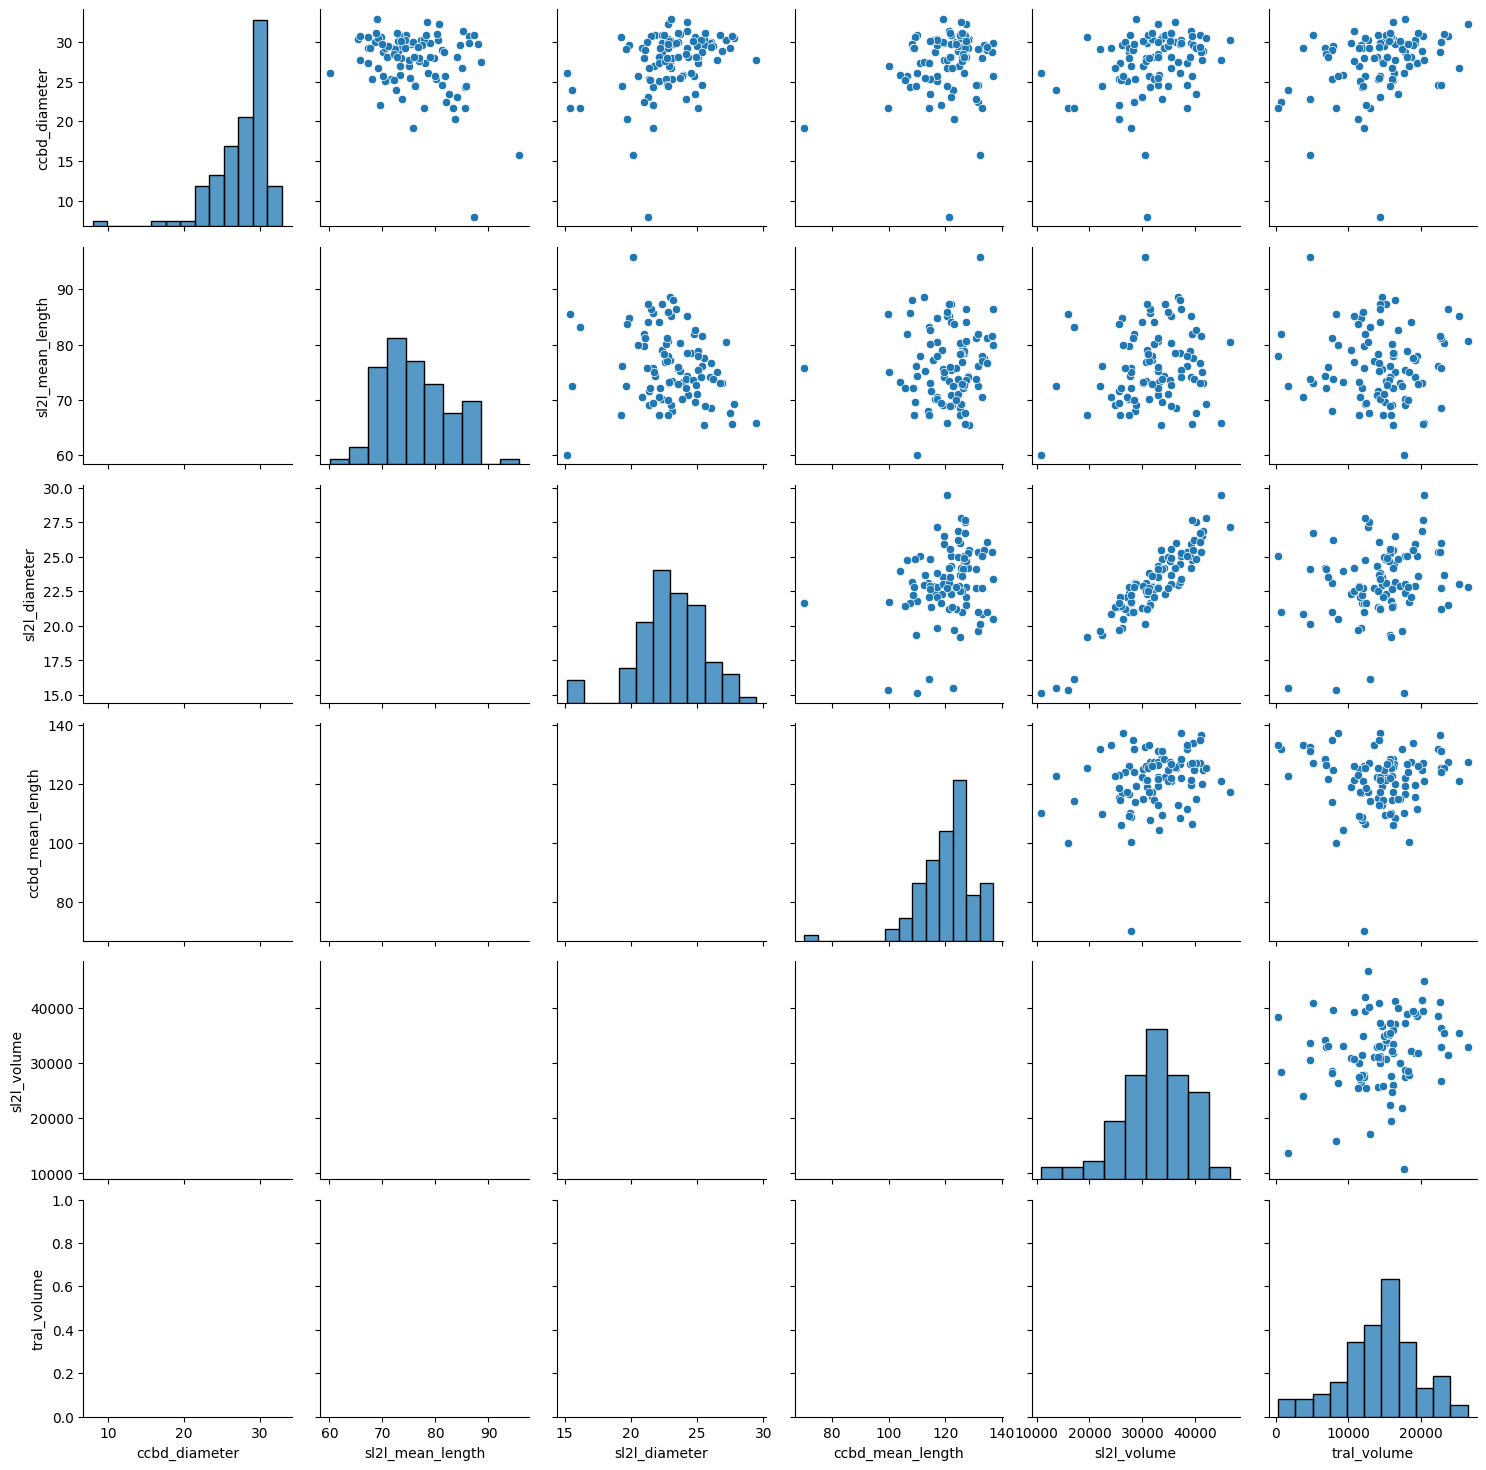

In [123]:
grid = sns.PairGrid(df1[['ccbd_diameter', 'sl2l_mean_length',
 'sl2l_diameter', 'ccbd_mean_length',
 'sl2l_volume', 'tral_volume']])
grid.map_diag(sns.histplot)
grid.map_upper(sns.scatterplot)

# Identificar versus estimar

Es importante distinguir entre algunos conceptos:

- **Estimando y estimador**. El _estimando_ es la cantidad que queremos estimar, que en casos paramétricos suele ser alguno de los parámetros poblacionales (por ejemplo $\beta_1$). En cambio, el _estimador_ es una función de los datos (es decir un _estadístico_) que nos permite aproximarnos al valor real (por ejemplo $\hat{\beta}_1$, el valor calculado por cuadrados mínimos, estima $\beta_1$).

Hay dos tipos de estimandos:
- **Estimando causal**: es un estimando que involucra contrafácticos y por lo tanto no es inmediatamente calculable (involucra "datos faltantes" imposibles de medir). El que venimos viendo fundamentalmente es el ATE, $\E[Y(1)] - \E[Y(0)]$
- **Estimando estadístico**: es un estimando que no involucra contrafácticos y por lo tanto puede ser calculado a partir de los datos sobre lo que realmente ocurrió (independientemente de si tenemos acceso o no a esos datos).

Y esto es fundamental para distinguir claramente dos etapas del análisis causal:

- **Identificación** es el proceso de utilizar hipótesis causales para transformar un estimando causal en un estimando estadístico equivalente.
- **Estimación**: es el proceso de elegir y calcular un estimador para nuestro estimando elegido previamente.

TENER EN CUENTA
- ¡Sin contrafácticos no hay causalidad!
- ¡Sin hipótesis causales, no hay conclusiones causales!

In [67]:
df.loc[df["label"] == 1].ccbd_diameter.describe()

count    50.000000
mean     28.103678
std       2.898058
min      19.177300
25%      26.069950
50%      28.175700
75%      30.204200
max      32.899700
Name: ccbd_diameter, dtype: float64

In [20]:
import numpy as np
for i in range(10, 100, 10):
    dat = np.percentile(df.loc[df["label"] == 1].ccbd_diameter.values, i)
    print(f'perc.{i}', round(dat,2))
   

perc.10 25.05
perc.20 25.75
perc.30 26.89
perc.40 27.66
perc.50 28.18
perc.60 29.76
perc.70 30.03
perc.80 30.35
perc.90 30.98


<Axes: >

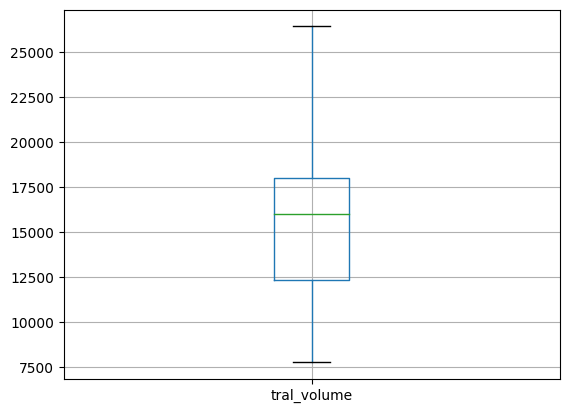

In [30]:
#df.loc[df["label"] == 0].ccbd_diameter.boxplot()
df.loc[df["label"] == 1].boxplot(column='tral_volume')

In [21]:
df.loc[df["label"] == 1][['ccbd_diameter', 'sl2l_mean_length',
 'sl2l_diameter', 'ccbd_mean_length',
 'sl2l_volume', 'tral_volume','label']]

,ccbd_diameter,sl2l_mean_length,sl2l_diameter,ccbd_mean_length,sl2l_volume,tral_volume,label
0,27.3579,77.9722,25.0746,111.2370,38503.1,19479.70,1
1,25.3084,71.5813,21.3498,115.1110,25625.7,14019.30,1
2,26.0740,60.0889,15.1676,109.9450,10857.2,17719.00,1
3,30.9647,74.3867,21.7978,109.9970,27759.5,15856.40,1
4,24.6510,76.1318,25.3700,131.7290,38485.5,22291.20,1
5,30.7161,69.6498,24.8067,109.2920,33662.6,15039.70,1
6,25.7489,81.8376,24.7599,106.3560,39404.1,12254.60,1
7,28.7169,70.1248,22.3636,116.5820,27545.1,17867.90,1
8,25.3807,67.9557,23.1303,113.8300,28554.7,7780.34,1
9,28.1768,70.8389,24.3321,122.1440,32939.9,13914.50,1


In [22]:
df.loc[df["label"] == 0][['ccbd_diameter', 'sl2l_mean_length',
 'sl2l_diameter', 'ccbd_mean_length',
 'sl2l_volume', 'tral_volume','label']]

,ccbd_diameter,sl2l_mean_length,sl2l_diameter,ccbd_mean_length,sl2l_volume,tral_volume,label
50,25.40080,80.1352,22.6376,114.572,32253.4,15989.600000,0
51,28.93740,72.9981,26.8996,124.657,41485.0,20127.000000,0
52,23.94800,72.5784,15.5295,122.730,13747.1,1650.080000,0
53,23.01760,84.1201,21.3053,122.238,29989.3,14329.700000,0
54,29.50440,73.7467,26.1879,124.552,39722.3,7819.510000,0
55,24.58840,81.2337,22.7092,131.017,32902.7,22779.900000,0
56,29.22150,70.5448,20.8301,133.130,24040.2,3740.830000,0
57,27.56320,76.8634,22.5518,125.908,30702.2,10761.300000,0
58,29.62110,77.4990,25.4824,133.619,39524.5,18941.100000,0
59,29.28850,74.2537,24.1977,128.197,34147.3,6778.540000,0
